In [106]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Reading and Understanding Data

In [39]:
# read the data
df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Exploratory Data Analysis

## Data Cleaning

In [5]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

## Univariate Analysis

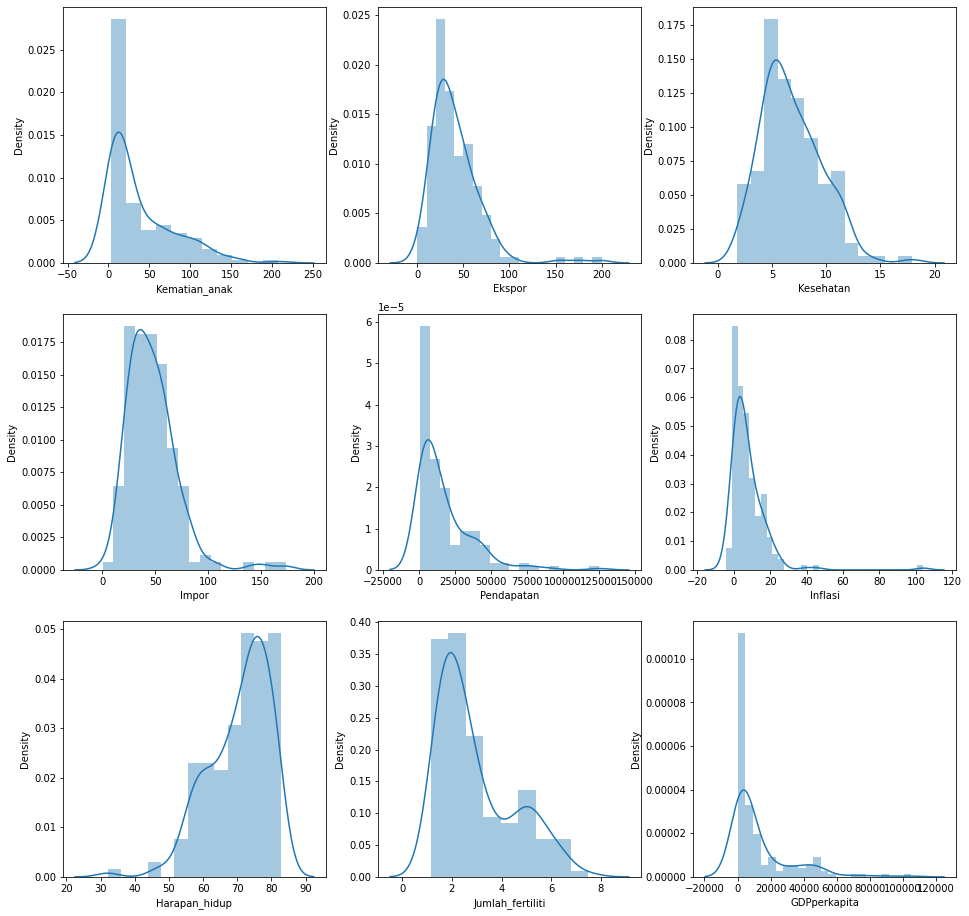

In [9]:
plt.figure(figsize=(16, 16))

for i in enumerate(df.describe().columns):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]])
plt.show()

## Bivariate Analysis

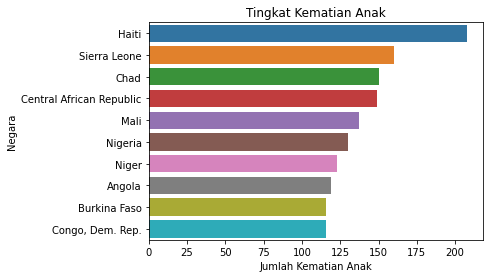

In [13]:
kematian = df.sort_values(by = ['Kematian_anak'], ascending = False)
sns.barplot(data = kematian[:10], x = 'Kematian_anak', y = 'Negara')
plt.title('Tingkat Kematian Anak')
plt.xlabel('Jumlah Kematian Anak')
plt.ylabel('Negara')
plt.show()

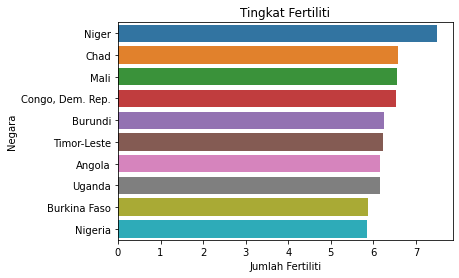

In [14]:
fertiliti = df.sort_values(by = ['Jumlah_fertiliti'], ascending = False)
sns.barplot(data = fertiliti[:10], x = 'Jumlah_fertiliti', y = 'Negara')
plt.title('Tingkat Fertiliti')
plt.xlabel('Jumlah Fertiliti')
plt.ylabel('Negara')
plt.show()

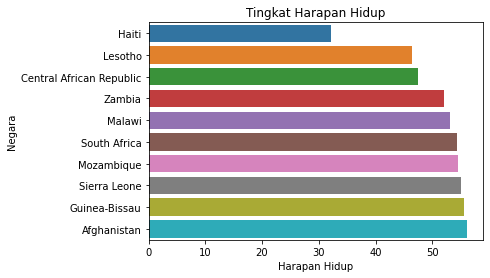

In [16]:
harapan_hidup = df.sort_values(by = ['Harapan_hidup'], ascending = True)
sns.barplot(data = harapan_hidup[:10], x = 'Harapan_hidup', y = 'Negara')
plt.title('Tingkat Harapan Hidup')
plt.xlabel('Harapan Hidup')
plt.ylabel('Negara')
plt.show()

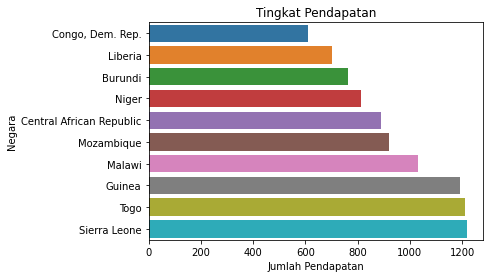

In [18]:
pendapatan = df.sort_values(by = ['Pendapatan'], ascending = True)
sns.barplot(data = pendapatan[:10], x = 'Pendapatan', y = 'Negara')
plt.title('Tingkat Pendapatan')
plt.xlabel('Jumlah Pendapatan')
plt.ylabel('Negara')
plt.show()

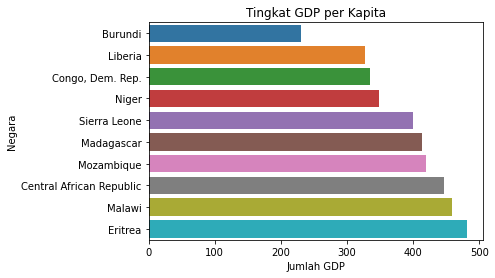

In [21]:
gdp = df.sort_values(by = ['GDPperkapita'], ascending = True)
sns.barplot(data = gdp[:10], x = 'GDPperkapita', y = 'Negara')
plt.title('Tingkat GDP per Kapita')
plt.xlabel('Jumlah GDP')
plt.ylabel('Negara')
plt.show()

## Multivariate Analysis

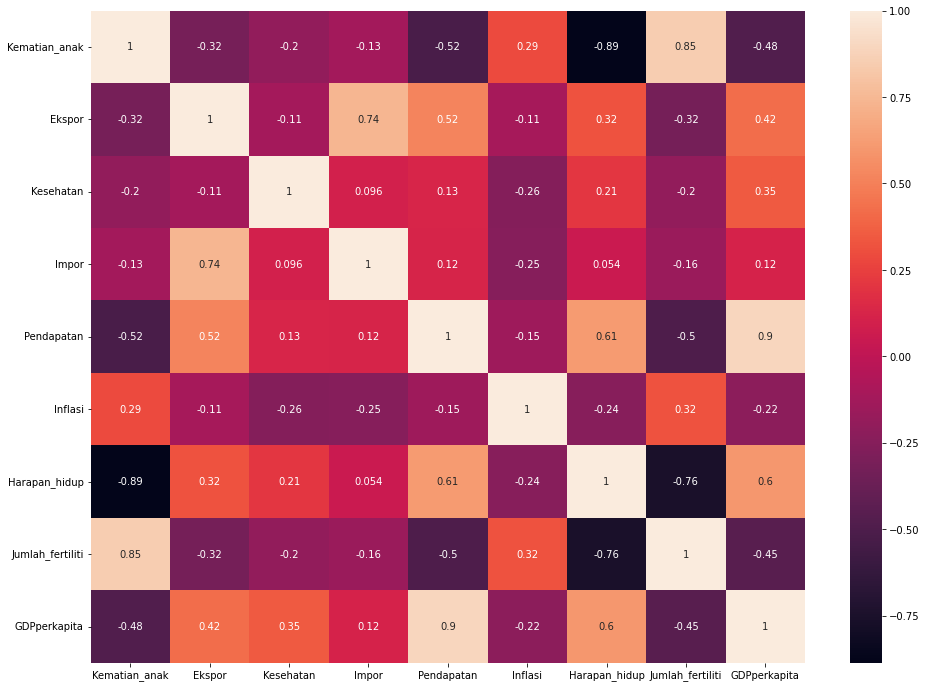

In [22]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Outliers Treatment

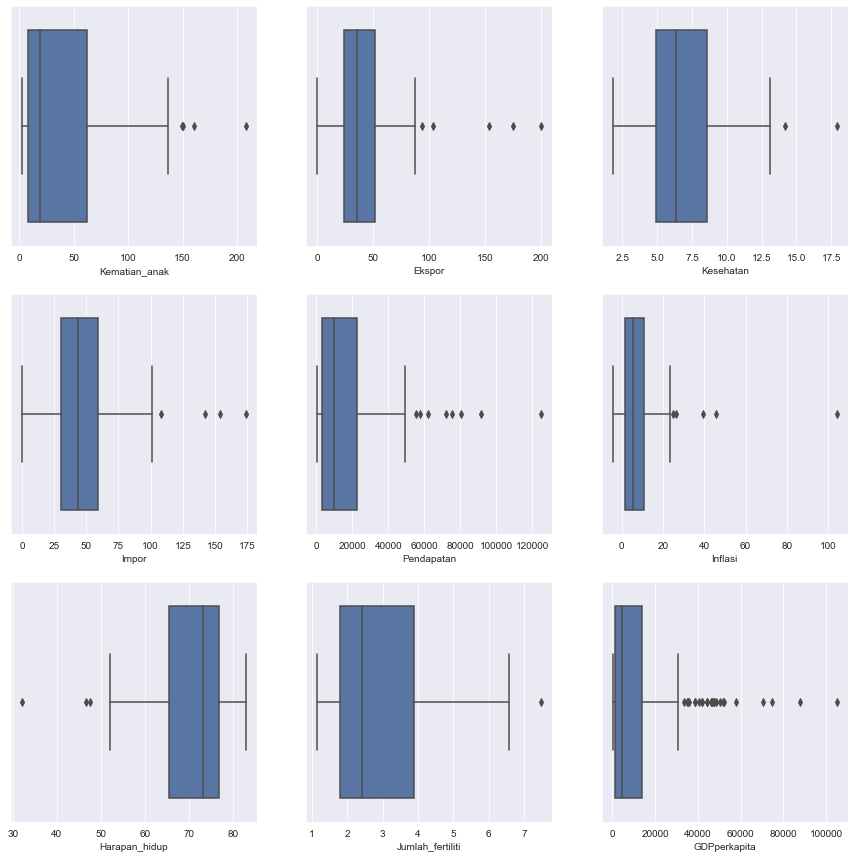

In [30]:
plt.figure(figsize = (15, 15))
for index, column in enumerate(df.describe().columns):
    plt.subplot(3, 3, index + 1)
    sns.boxplot(x = column, data = df)
plt.show()

In [61]:
numeric_columns = ['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']

In [68]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - IQR * 1.5
upper = Q3 + IQR * 1.5

In [70]:
df_non_outlier = df.copy()
for x in numeric_columns:
    filter_min = df_non_outlier[x] < lower[x]
    filter_max = df_non_outlier[x] > upper[x]
    df_non_outlier = df_non_outlier[~(filter_min | filter_max)]

In [71]:
df_non_outlier

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Scaling Data

In [93]:
sc = StandardScaler()
df_sc = sc.fit_transform(df_non_outlier[['GDPperkapita', 'Kesehatan']])

# Creating KMeans Clustering and Visualizing Clusters Formed

In [94]:
kmeans1 = KMeans(n_clusters = 2, random_state = 100).fit(df_sc)
labels1 = kmeans1.labels_
labels1

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [95]:
df3 = pd.DataFrame(data = df_sc, columns = ['GDPperkapita', 'Kesehatan'])
df3['Cluster'] = labels1
df3

,GDPperkapita,Kesehatan,Cluster
0,-0.825561,0.560239,0
1,-0.328385,0.092995,0
2,-0.276376,-0.986655,0
3,-0.407101,-1.585453,0
4,0.811593,-0.142895,1
...,...,...,...
123,-0.709315,-0.242695,0
124,-0.485817,-0.496730,0
125,-0.719154,0.224549,0
126,-0.719154,-0.528484,0


n_cluster = 2


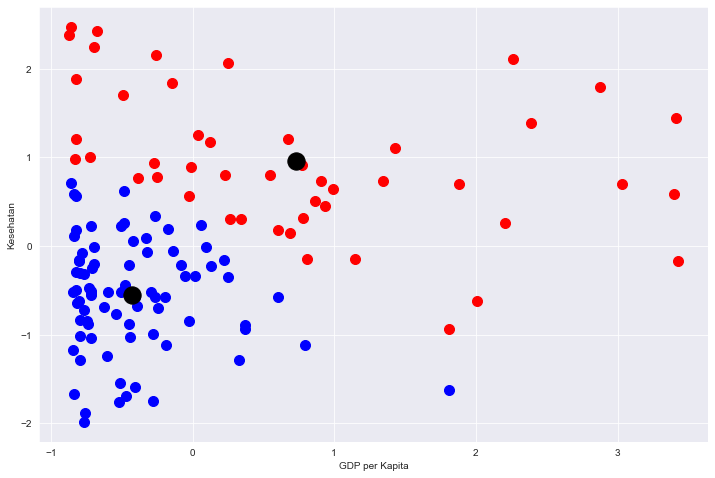

In [102]:
print('n_cluster = 2')
plt.figure(figsize = (12, 8))
plt.scatter(df3['GDPperkapita'][df3.Cluster == 0], df3['Kesehatan'][df3.Cluster == 0], c = 'blue', s = 100)
plt.scatter(df3['GDPperkapita'][df3.Cluster == 1], df3['Kesehatan'][df3.Cluster == 1], c = 'red', s = 100)
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c = 'black', s = 300)
plt.xlabel('GDP per Kapita')
plt.ylabel('Kesehatan')
plt.show()

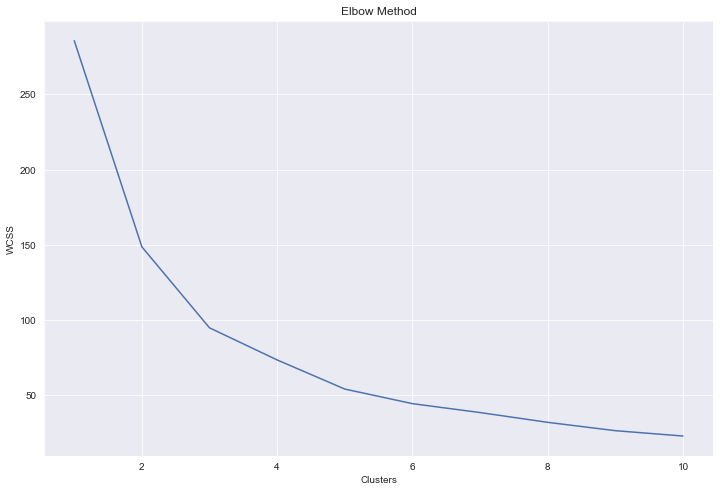

In [97]:
plt.subplots(figsize = (12, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=100)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [98]:
kmeans2 = KMeans(n_clusters = 3, random_state = 100).fit(df3)
labels2 = kmeans2.labels_

In [109]:
df4 = pd.DataFrame(data = df3, columns = ['GDPperkapita', 'Kesehatan'])
df4['Cluster'] = labels2
df4

,GDPperkapita,Kesehatan,Cluster
0,-0.825561,0.560239,1
1,-0.328385,0.092995,1
2,-0.276376,-0.986655,1
3,-0.407101,-1.585453,1
4,0.811593,-0.142895,0
...,...,...,...
123,-0.709315,-0.242695,1
124,-0.485817,-0.496730,1
125,-0.719154,0.224549,1
126,-0.719154,-0.528484,1


n_cluster = 3


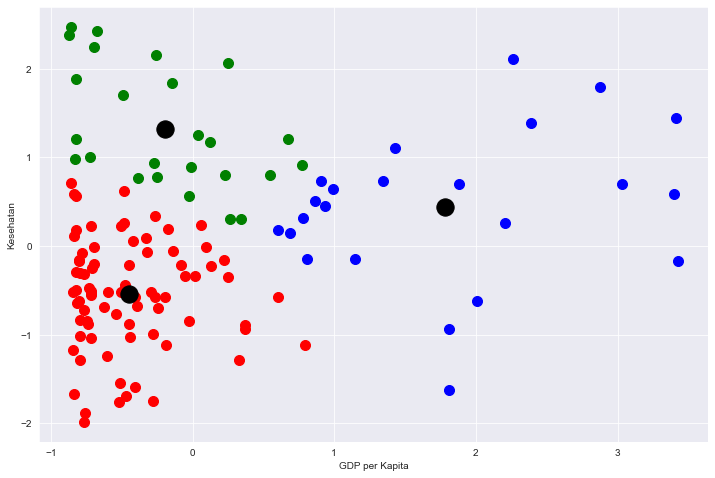

In [110]:
print('n_cluster = 3')
plt.figure(figsize = (12, 8))
plt.scatter(df4['GDPperkapita'][df4.Cluster == 0], df4['Kesehatan'][df4.Cluster == 0], c = 'blue', s = 100)
plt.scatter(df4['GDPperkapita'][df4.Cluster == 1], df4['Kesehatan'][df4.Cluster == 1], c = 'red', s = 100)
plt.scatter(df4['GDPperkapita'][df4.Cluster == 2], df4['Kesehatan'][df4.Cluster == 2], c = 'green', s = 100)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], c = 'black', s = 300)
plt.xlabel('GDP per Kapita')
plt.ylabel('Kesehatan')
plt.show()

In [111]:
print('Skor n_cluster = 2 adalah', silhouette_score(df4, labels= labels1))
print('Skor n_cluster = 3 adalah', silhouette_score(df4, labels= labels2))

Skor n_cluster = 2 adalah 0.43244321492929155
Skor n_cluster = 3 adalah 0.5419678597561084


# Report Countries

In [138]:
final_df = pd.concat([df, df4['Cluster']], axis = 1)
final_df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.0


In [139]:
cluster0 = final_df['Cluster'] == 0
countries_cluster0 = final_df[(cluster0)]
countries_cluster0

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
4,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200,0.0
8,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900,0.0
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840,0.0
11,Bahrain,8.6,69.500,4.97,50.9000,41100,7.440,76.0,2.16,20700,0.0
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,0.0
34,China,15.7,26.300,5.07,22.6000,9530,6.940,74.6,1.59,4560,0.0
35,Colombia,18.6,15.900,7.59,17.8000,10900,3.860,76.4,2.01,6250,0.0
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,0.0
42,Cyprus,3.6,50.200,5.97,57.5000,33900,2.010,79.9,1.42,30800,0.0
48,El Salvador,19.2,26.900,6.91,46.6000,7300,2.650,74.1,2.27,2990,0.0


In [140]:
cluster1 = final_df['Cluster'] == 1
countries_cluster1 = final_df[(cluster1)]
countries_cluster1

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1.0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1.0
...,...,...,...,...,...,...,...,...,...,...,...
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300,1.0
124,Romania,11.5,32.6,5.58,38.8,17800,3.53,73.7,1.59,8230,1.0
125,Russia,10.0,29.2,5.08,21.1,23100,14.20,69.2,1.57,10700,1.0
126,Rwanda,63.6,12.0,10.50,30.0,1350,2.61,64.6,4.51,563,1.0


In [141]:
cluster2 = final_df['Cluster'] == 2
countries_cluster2 = final_df[(cluster2)]
countries_cluster2

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2.0
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,2.0
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180,2.0
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.780,71.6,3.20,1980,2.0
22,Brazil,19.8,10.7,9.01,11.8,14500,8.410,74.2,1.80,11200,2.0
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,2.0
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897,2.0
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.700,60.4,4.95,2740,2.0
46,Ecuador,25.1,27.9,8.06,32.4,9350,7.470,76.7,2.66,4660,2.0
52,Fiji,24.1,57.8,4.86,63.9,7350,4.230,65.3,2.67,3650,2.0


In [145]:
countries_cluster1[['Negara', 'GDPperkapita', 'Kesehatan', 'Cluster']].sort_values(by = ['GDPperkapita', 'Kesehatan'], ascending = True).head(10).reset_index(drop = True)

,Negara,GDPperkapita,Kesehatan,Cluster
0,Liberia,327,11.80,1.0
1,"Congo, Dem. Rep.",334,7.91,1.0
2,Niger,348,5.16,1.0
3,Central African Republic,446,3.98,1.0
4,Eritrea,482,2.66,1.0
5,Afghanistan,553,7.58,1.0
6,Gambia,562,5.69,1.0
7,Rwanda,563,10.50,1.0
8,Burkina Faso,575,6.74,1.0
9,Nepal,592,5.25,1.0
